In [2]:
import numpy as np
import pandas as pd
import sklearn as skl
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sea

# control the plotsize
plt.rcParams['figure.figsize'] = [5,3]

In [3]:
raw2 = pd.read_csv('credit_cards.csv')

# PAY_X: -2 = no credit was used that month
# PAY_X: 0 = revolving credit

raw2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0,0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272,3455,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331,14948,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314,28959,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940,19146,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [4]:
raw2.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4896.0,2448.500000,1413.497789,1.0,1224.75,2448.5,3672.25,4896.0
LIMIT_BAL,4896.0,165671.977124,130514.804670,10000.0,50000.00,140000.0,230000.00,1000000.0
SEX,4896.0,1.572508,0.494765,1.0,1.00,2.0,2.00,2.0
EDUCATION,4896.0,1.821283,0.765260,0.0,1.00,2.0,2.00,6.0
MARRIAGE,4896.0,1.566585,0.525216,0.0,1.00,2.0,2.00,3.0
AGE,4896.0,35.368873,9.266057,21.0,28.00,34.0,41.00,75.0
PAY_0,4896.0,0.005923,1.132023,-2.0,-1.00,0.0,0.00,8.0
PAY_2,4896.0,-0.146855,1.207688,-2.0,-1.00,0.0,0.00,7.0
PAY_3,4896.0,-0.157475,1.225336,-2.0,-1.00,0.0,0.00,7.0
PAY_4,4896.0,-0.247141,1.146381,-2.0,-1.00,0.0,0.00,7.0


In [5]:
np.shape(raw2)

(4896, 25)

In [6]:
raw2.isnull().sum().sum()

3

In [7]:
nan_rows = raw2[raw2['PAY_AMT5'].isnull()]
nan_rows1 = raw2[raw2['PAY_AMT6'].isnull()]
nan_rows2 = raw2[raw2['default.payment.next.month'].isnull()]

In [8]:
nan_rows1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
4895,4896,240000.0,2,3,1,41,-1,-1,-1,0,...,3724,5814,10942.0,3724.0,7448.0,0.0,5814.0,NaN,NaN,NaN


In [9]:
nan_rows2

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
4895,4896,240000.0,2,3,1,41,-1,-1,-1,0,...,3724,5814,10942.0,3724.0,7448.0,0.0,5814.0,NaN,NaN,NaN


In [10]:
# all the null values are in the same row, so remove this row
nan_rows = raw2['PAY_AMT5'].isnull()
data = raw2[nan_rows == False]

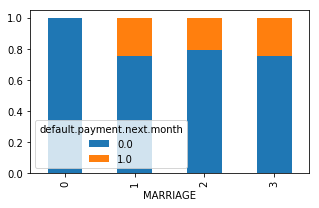

In [12]:
# Marriage doesn't seem to discirminate very strongly
table = pd.crosstab(data['MARRIAGE'], data['default.payment.next.month'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

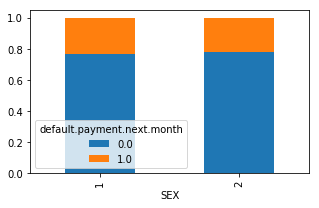

In [13]:
# Gender doesn't seem to discirminate very strongly
table = pd.crosstab(data['SEX'], data['default.payment.next.month'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

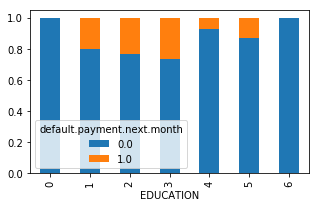

In [14]:
# Education may have some impact on defaulting
table = pd.crosstab(data['EDUCATION'], data['default.payment.next.month'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

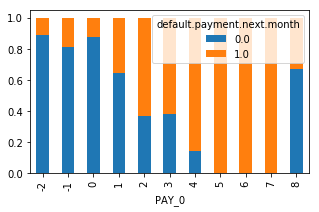

In [15]:
# The time at which the bills are paid seems to have an impact on defaulting

table = pd.crosstab(data['PAY_0'], data['default.payment.next.month'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

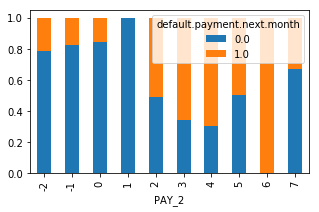

In [16]:
table = pd.crosstab(data['PAY_2'], data['default.payment.next.month'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

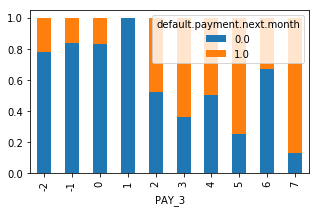

In [17]:
table = pd.crosstab(data['PAY_3'], data['default.payment.next.month'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [18]:
# make dummy variables for the categorical variables

dummy_standing = pd.get_dummies(data['SEX'], prefix='SEX')
dummy_standing_ed = pd.get_dummies(data['EDUCATION'], prefix='ED')
dummy_standing_mar = pd.get_dummies(data['MARRIAGE'], prefix='MAR')
dummy_standing_pay0 = pd.get_dummies(data['PAY_0'], prefix='PAY0')
dummy_standing_pay2 = pd.get_dummies(data['PAY_2'], prefix='PAY2')
dummy_standing_pay3 = pd.get_dummies(data['PAY_3'], prefix='PAY3')
dummy_standing_pay4 = pd.get_dummies(data['PAY_4'], prefix='PAY4')
dummy_standing_pay5 = pd.get_dummies(data['PAY_5'], prefix='PAY5')
dummy_standing_pay6 = pd.get_dummies(data['PAY_6'], prefix='PAY6')


In [19]:
data = data.drop(['SEX'], axis=1).join(dummy_standing)
data = data.drop(['EDUCATION'], axis=1).join(dummy_standing_ed)
data = data.drop(['MARRIAGE'], axis=1).join(dummy_standing_mar)
data = data.drop(['PAY_0'], axis=1).join(dummy_standing_pay0)
data = data.drop(['PAY_2'], axis=1).join(dummy_standing_pay2)
data = data.drop(['PAY_3'], axis=1).join(dummy_standing_pay3)
data = data.drop(['PAY_4'], axis=1).join(dummy_standing_pay4)
data = data.drop(['PAY_5'], axis=1).join(dummy_standing_pay5)
data = data.drop(['PAY_6'], axis=1).join(dummy_standing_pay6)

In [20]:
# make dependent and independent variable data sets
y = data['default.payment.next.month'] # dep variable
X = data.drop(['default.payment.next.month'], axis=1) # indep variable
X = X.drop(['ID'], axis=1) # indep variable

In [21]:
# split into training and testing subsets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [22]:
# define a function to output the cross validation and test accuracy of a specified logistic regression.
def find_cv_error(X_train, X_test, y_train, logreg, i):
    colnames = list(X_train)
    rfe = RFE(logreg, i)
    rfe = rfe.fit(X_train, y_train )
    names = []
    for j in range(X_train.shape[1]):
        if(rfe.support_[j] == 1):
            names.append(colnames[j])    
    
    X_train_sub = X_train[names]
    X_test_sub = X_test[names]
    
    logreg = LogisticRegression()
    logreg.fit(X_train_sub,y_train)
    
    kfold = skl.model_selection.KFold(n_splits=10, random_state=7)
    m = LogisticRegression()
    results = skl.model_selection.cross_val_score(m, X_train_sub, y_train, cv=kfold, scoring='accuracy')
    
    y_pred = logreg.predict(X_test_sub)
    return(results.mean(), logreg.score(X_test_sub, y_test));

In [23]:
# loop over a range of logistic regression models where we select between 1 and 29 independent variables
# and calculate which number of variables gives us the best cross validation and test scores. These may be different
max_cv_accuracy = 0
best_cv_num_variables = 0
max_test_accuracy = 0
best_test_num_variables = 0

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


for i in range(1, 30):
    mean_error, test_score = find_cv_error(X_train, X_test, y_train, logreg, i)
#     print(i, '10-fold cv average accuracy: ', mean_error)
#     print(i, 'test score: ', test_score)
    if (mean_error > max_cv_accuracy):
        max_cv_accuracy = mean_error
        best_cv_num_variables = i
    if (test_score > max_test_accuracy):
        max_test_accuracy = test_score
        best_test_num_variables = i
        


In [24]:
print('best cv number of variables = ', best_cv_num_variables)
print('best cross validation accuracy = ', max_cv_accuracy) 
print('best test number of variables = ', best_test_num_variables)
print('best test accuracy = ', max_test_accuracy) 

best cv number of variables =  9
best cross validation accuracy =  0.8038748107938828
best test number of variables =  22
best test accuracy =  0.8202247191011236


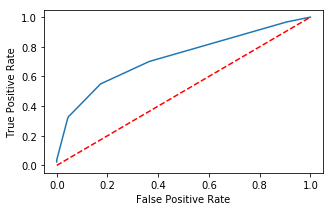

In [28]:
# produce ROC curve for the best cross validation score logistic regression

colnames = list(X_train)
rfe = RFE(logreg, best_cv_num_variables)
rfe = rfe.fit(X_train, y_train )
names = []
for j in range(X_train.shape[1]):
    if(rfe.support_[j] == 1):
        names.append(colnames[j])    
    
X_train_sub = X_train[names]
X_test_sub = X_test[names]
    
logreg = LogisticRegression()
logreg.fit(X_train_sub,y_train)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test_sub)) # we are somehow _measuring_ our predictive abilities
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_sub)[:,1])

plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()



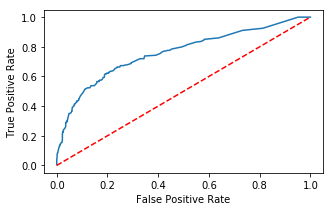

In [29]:
# produce ROC curve for the best test score logistic regression

colnames = list(X_train)
rfe = RFE(logreg, best_test_num_variables)
rfe = rfe.fit(X_train, y_train )
names = []
for j in range(X_train.shape[1]):
    if(rfe.support_[j] == 1):
        names.append(colnames[j])    
    
X_train_sub = X_train[names]
X_test_sub = X_test[names]
    
logreg = LogisticRegression()
logreg.fit(X_train_sub,y_train)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test_sub)) # we are somehow _measuring_ our predictive abilities
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_sub)[:,1])

plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()



# Scale all the independent variables to have mean = 0, sd = 1, to see if there is an improvement in the cross validation or test scores.

In [41]:
# do the same as before, finding the best set of variables to get the best cross validation and test scores
# but here the independent variables are scaled first.

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

sc = StandardScaler()


max_cv_accuracy = 0
best_cv_num_variables = 0
max_test_accuracy = 0
best_test_num_variables = 0


from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# scale data
X_train_sc = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_test_sc = scaler.transform(X_test)

for i in range(1, 30):
    rfe = RFE(logreg, i)
    rfe = rfe.fit(X_train_sc, y_train )
    
    X_train_sub_sc = X_train_sc[:,rfe.support_ == 1]
    X_test_sub_sc = X_test_sc[:,rfe.support_ == 1]
    
    logreg = LogisticRegression()
    logreg.fit(X_train_sub_sc,y_train)
    
    kfold = skl.model_selection.KFold(n_splits=10, random_state=7)
    m = LogisticRegression()
    results = skl.model_selection.cross_val_score(m, X_train_sub_sc, y_train, cv=kfold, scoring='accuracy')
    test_score = logreg.score(X_test_sub_sc, y_test)
#     print('10-fold cv average accuracy: ',results.mean())
#     print(i, 'test score: ', test_score)
    if (results.mean() > max_cv_accuracy):
        max_cv_accuracy = results.mean()
        best_cv_num_variables = i
    if (test_score > max_test_accuracy):
        max_test_accuracy = test_score
        best_test_num_variables = i   
        
print('best cv number of variables = ', best_cv_num_variables)
print('best cross validation accuracy = ', max_cv_accuracy) 
print('best test number of variables = ', best_test_num_variables)
print('best test accuracy = ', max_test_accuracy) 

best cv number of variables =  19
best cross validation accuracy =  0.8020936635523774
best test number of variables =  5
best test accuracy =  0.8181818181818182


# Scaling the data sets does not seem to improve the cross validation


# Try playing with some parameters. We consider changing C and the penalty norm

In [42]:
# change the values of C in the logistic regression and find best set of variables according to cv and test score

C_param_range = [0.001,0.01,0.1,1,10,100]

max_cv_accuracy = 0
best_cv_num_variables = 0
best_cv_C = 0
max_test_accuracy = 0
best_test_num_variables = 0
best_test_C = 0

for i in range(1, 30):
    for j in C_param_range:
        logreg = LogisticRegression(penalty = 'l2', C = j,random_state = 0)
        mean_error, test_score = find_cv_error(X_train, X_test, y_train, logreg, i)
       # print(i, '10-fold cv average accuracy: ', mean_error)
        if (mean_error > max_cv_accuracy):
            max_cv_accuracy = mean_error
            best_cv_num_variables = i
            best_cv_C = j
        if (test_score > max_test_accuracy):
            max_test_accuracy = test_score
            best_test_num_variables = i
            best_test_C = j


print('best number of variables cv = ', best_cv_num_variables)
print('best cross validation accuracy = ', max_cv_accuracy)
print('best cv C = ', best_cv_C)

print('best number of variables test = ', best_test_num_variables)
print('best test accuracy = ', max_test_accuracy)
print('best test C = ', best_test_C)



best number of variables cv =  13
best cross validation accuracy =  0.8054067279085547
best cv C =  1
best number of variables test =  22
best test accuracy =  0.8212461695607763
best test C =  100


In [46]:
# change to l1 norm and go over the values of C in the logistic regression and 
# find best set of variables according to cv and test score

C_param_range = [0.001,0.01,0.1,1,10,100]

max_accuracy = 0
best_num_variables = 0
best_C = 0

for i in range(1,30):
    for j in C_param_range:
        logreg = LogisticRegression(penalty = 'l1', C = j,random_state = 0)
        mean_error, test_score = find_cv_error(X_train, X_test, y_train, logreg, i)
       # print(i, '10-fold cv average accuracy: ', mean_error)
        if (mean_error > max_cv_accuracy):
            max_cv_accuracy = mean_error
            best_cv_num_variables = i
            best_cv_C = j
        if (test_score > max_test_accuracy):
            max_test_accuracy = test_score
            best_test_num_variables = i
            best_test_C = j
            
print('best number of variables cv = ', best_cv_num_variables)
print('best cross validation accuracy = ', max_cv_accuracy)
print('best cv C = ', best_cv_C)

print('best number of variables test = ', best_test_num_variables)
print('best test accuracy = ', max_test_accuracy)
print('best test C = ', best_test_C)



best number of variables cv =  21
best cross validation accuracy =  0.8059175844250743
best cv C =  10
best number of variables test =  22
best test accuracy =  0.8212461695607763
best test C =  100


# Changing the value of C (in the considered range) and the penalization norm (between l1 and l2) do not change improve the results according to cross validation measurement. However, using both l1 and l2 norm with C = 100, and taking 22 variables improves the test score.

# Finally consider if creating some new variables improves results
Add in variables which divide the billing amount and the payment amount by the limit balance, as this may be related to likelihood of defaulting

In [47]:
X_train2 = X_train
X_test2 = X_test

X_train2["BILL_LIM1"] = X_train["BILL_AMT1"] / X_train["LIMIT_BAL"];
X_train2["BILL_LIM2"] = X_train["BILL_AMT2"] / X_train["LIMIT_BAL"];
X_train2["BILL_LIM3"] = X_train["BILL_AMT3"] / X_train["LIMIT_BAL"];
X_train2["BILL_LIM4"] = X_train["BILL_AMT4"] / X_train["LIMIT_BAL"];
X_train2["BILL_LIM5"] = X_train["BILL_AMT5"] / X_train["LIMIT_BAL"];
X_train2["BILL_LIM6"] = X_train["BILL_AMT6"] / X_train["LIMIT_BAL"];


X_test2["BILL_LIM1"] = X_test["BILL_AMT1"] / X_test["LIMIT_BAL"];
X_test2["BILL_LIM2"] = X_test["BILL_AMT2"] / X_test["LIMIT_BAL"];
X_test2["BILL_LIM3"] = X_test["BILL_AMT3"] / X_test["LIMIT_BAL"];
X_test2["BILL_LIM4"] = X_test["BILL_AMT4"] / X_test["LIMIT_BAL"];
X_test2["BILL_LIM5"] = X_test["BILL_AMT5"] / X_test["LIMIT_BAL"];
X_test2["BILL_LIM6"] = X_test["BILL_AMT6"] / X_test["LIMIT_BAL"];

X_train2["PAY_LIM1"] = X_train["PAY_AMT1"] / X_train["LIMIT_BAL"];
X_train2["PAY_LIM2"] = X_train["PAY_AMT2"] / X_train["LIMIT_BAL"];
X_train2["PAY_LIM3"] = X_train["PAY_AMT3"] / X_train["LIMIT_BAL"];
X_train2["PAY_LIM4"] = X_train["PAY_AMT4"] / X_train["LIMIT_BAL"];
X_train2["PAY_LIM5"] = X_train["PAY_AMT5"] / X_train["LIMIT_BAL"];
X_train2["PAY_LIM6"] = X_train["PAY_AMT6"] / X_train["LIMIT_BAL"];

X_test2["PAY_LIM1"] = X_test["PAY_AMT1"] / X_test["LIMIT_BAL"];
X_test2["PAY_LIM2"] = X_test["PAY_AMT2"] / X_test["LIMIT_BAL"];
X_test2["PAY_LIM3"] = X_test["PAY_AMT3"] / X_test["LIMIT_BAL"];
X_test2["PAY_LIM4"] = X_test["PAY_AMT4"] / X_test["LIMIT_BAL"];
X_test2["PAY_LIM5"] = X_test["PAY_AMT5"] / X_test["LIMIT_BAL"];
X_test2["PAY_LIM6"] = X_test["PAY_AMT6"] / X_test["LIMIT_BAL"];

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

In [48]:
# find the best set of variables for cv and test score when we consider the data set 
# with additional variables which are created above

max_cv_accuracy = 0
best_cv_num_variables = 0
max_test_accuracy = 0
best_test_num_variables = 0
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


for i in range(1, 30):
    mean_error, test_score = find_cv_error(X_train2, X_test2, y_train, logreg, i)
#     print(i, '10-fold cv average accuracy: ', mean_error)
#     print(i, 'test score: ', test_score)
    if (mean_error > max_cv_accuracy):
        max_cv_accuracy = mean_error
        best_cv_num_variables = i
    if (test_score > max_test_accuracy):
        max_test_accuracy = test_score
        best_test_num_variables = i    
        
print('best cv number of variables = ', best_cv_num_variables)
print('best cross validation accuracy = ', max_cv_accuracy) 
print('best test number of variables = ', best_test_num_variables)
print('best test accuracy = ', max_test_accuracy) 


best cv number of variables =  13
best cross validation accuracy =  0.8054067279085547
best test number of variables =  22
best test accuracy =  0.8192032686414709


# There is an improvement in cross validation accuracy using the data set with newly created variables. However, the accuracy on the test score is better without the new variables.

In [58]:
# The best logistic regression considered according to accuracy on the test data set is  one where we choose
# 22 of the variables from the initial data set, and use RFE to select these variables. Then the logisitic regression
# is performed with either l1 or l2 norm and a value of C = 100. This model is derived below.

num_test_vars = 22
colnames = list(X_train)
logreg = LogisticRegression(penalty = 'l2', C = 100, random_state = 0)
rfe = RFE(logreg, num_test_vars)
rfe = rfe.fit(X_train, y_train )
names = []
for j in range(X_train.shape[1]):
    if(rfe.support_[j] == 1):
        names.append(colnames[j]) 

print("Variables used for best test score:", names)



mean_error, test_score = find_cv_error(X_train2, X_test2, y_train, logreg, num_test_vars)

print("\nBest test accuracy", test_score)



Variables used for best test score: ['SEX_1', 'SEX_2', 'ED_1', 'ED_2', 'ED_3', 'MAR_1', 'MAR_2', 'MAR_3', 'PAY0_-2', 'PAY0_-1', 'PAY0_0', 'PAY0_1', 'PAY3_7', 'PAY4_7', 'PAY5_3', 'PAY5_7', 'PAY6_-2', 'PAY6_-1', 'PAY6_0', 'PAY6_2', 'PAY6_3', 'PAY_LIM2']

Best test accuracy 0.8212461695607763


In [59]:
# The best logistic regression considered according to accuracy on the test data set is  one where we choose
# 13 of the variables from the data set where we create new variables by dividing the billing amount and the 
# payment amount by the limit balance, and use RFE to select these variables. 
# Only vanilla logistic regression was considered here. This model is derived below.


num_cv_vars = 13
logreg = LogisticRegression()

colnames2 = list(X_train2)
rfe = RFE(logreg, num_cv_vars)
rfe = rfe.fit(X_train2, y_train )
names = []
for j in range(X_train2.shape[1]):
    if(rfe.support_[j] == 1):
        names.append(colnames[j]) 

print("Variables used for best cross validation accuracy:", names)



mean_error, test_score = find_cv_error(X_train2, X_test2, y_train, logreg, num_cv_vars)

print("\nBest cross validation accuracy", mean_error)


Variables used for best cross validation accuracy: ['PAY0_-2', 'PAY0_-1', 'PAY0_0', 'PAY0_2', 'PAY0_3', 'PAY0_4', 'PAY2_4', 'PAY3_2', 'PAY3_7', 'PAY4_3', 'PAY5_7', 'PAY_LIM2', 'PAY_LIM4']

Best cross validation accuracy 0.8054067279085547
